In [1]:
# 导入相关包
import numpy as np
import pandas as pd
from pandas import plotting

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 导入数据集
iris = pd.read_csv('F:\pydata\dataset\kaggle\iris.csv', usecols=[1, 2, 3, 4, 5])

&emsp;&emsp;接下来，通过机器学习，以花萼和花瓣的尺寸为根据，预测其品种。

&emsp;&emsp;在进行机器学习之前，将数据集拆分为训练和测试数据集。首先，使用标签编码将 3 种鸢尾花的品种名称转换为分类值（0, 1, 2）。

In [3]:
# 载入特征和标签集
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [4]:
# 对标签集进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


&emsp;&emsp;接着，将数据集以 7: 3 的比例，拆分为训练数据和测试数据：

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(105, 4) (105,) (45, 4) (45,)


&emsp;&emsp;检查不同模型的准确性：

In [6]:
# Support Vector Machine
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the SVM is: 1.0


In [7]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Logistic Regression is: 0.9555555555555556


In [8]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Decision Tree is: 0.9555555555555556


In [9]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the KNN is: 1.0


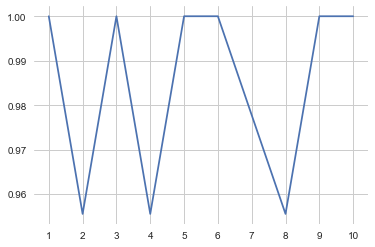

In [10]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

&emsp;&emsp;上面使用了数据集的所有列，下面将分别使用花瓣和花萼的尺寸：

In [12]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0) 
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [13]:
model=svm.SVC()

model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [14]:
model = LogisticRegression()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


In [15]:
model=DecisionTreeClassifier()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [16]:
model=KNeighborsClassifier(n_neighbors=3) 

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


&emsp;&emsp;从中不难看出，使用花瓣的尺寸来训练数据较花萼更准确。正如在探索性分析的热图中所看到的那样，花萼的宽度和长度之间的相关性非常低，而花瓣的宽度和长度之间的相关性非常高。